In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pylab as pl

In [86]:
data = pd.read_csv('data/births.csv')
data.head(2)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440


In [87]:
data.tail(2)

,year,month,day,gender,births
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [88]:
data.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
year      15547 non-null int64
month     15547 non-null int64
day       15067 non-null float64
gender    15547 non-null object
births    15547 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [90]:
data.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [91]:
data_1 = data.dropna()
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15067 entries, 0 to 15066
Data columns (total 5 columns):
year      15067 non-null int64
month     15067 non-null int64
day       15067 non-null float64
gender    15067 non-null object
births    15067 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 706.3+ KB


In [93]:
data_1['Sex M/F'] = data_1.gender.map({'F' : 1, 'M' : 0})
data_1

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,month,day,gender,births,Sex M/F
0,1969,1,1.0,F,4046,1
1,1969,1,1.0,M,4440,0
2,1969,1,2.0,F,4454,1
3,1969,1,2.0,M,4548,0
4,1969,1,3.0,F,4548,1
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,0
15063,1988,12,30.0,F,5742,1
15064,1988,12,30.0,M,6095,0
15065,1988,12,31.0,F,4435,1


In [99]:
DATA = data_1.drop('gender', axis = 1)
DATA

,year,month,day,births,Sex M/F
0,1969,1,1.0,4046,1
1,1969,1,1.0,4440,0
2,1969,1,2.0,4454,1
3,1969,1,2.0,4548,0
4,1969,1,3.0,4548,1
...,...,...,...,...,...
15062,1988,12,29.0,5944,0
15063,1988,12,30.0,5742,1
15064,1988,12,30.0,6095,0
15065,1988,12,31.0,4435,1


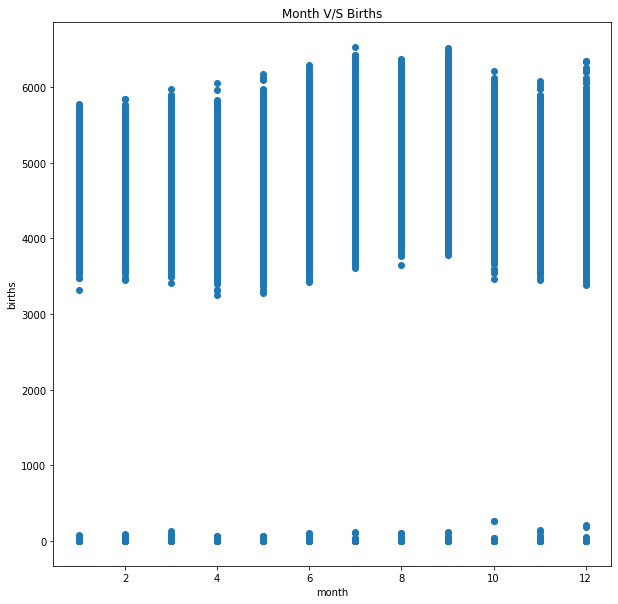

In [100]:
plt.figure(figsize = (10, 10))
plt.scatter(DATA['month'], DATA['births'])
plt.xlabel('month')
plt.ylabel('births')
plt.title('Month V/S Births')
plt.show()

In [101]:
x = DATA.drop('births', axis = 1)
x

,year,month,day,Sex M/F
0,1969,1,1.0,1
1,1969,1,1.0,0
2,1969,1,2.0,1
3,1969,1,2.0,0
4,1969,1,3.0,1
...,...,...,...,...
15062,1988,12,29.0,0
15063,1988,12,30.0,1
15064,1988,12,30.0,0
15065,1988,12,31.0,1


In [102]:
y = DATA['births']
y

0        4046
1        4440
2        4454
3        4548
4        4548
         ... 
15062    5944
15063    5742
15064    6095
15065    4435
15066    4698
Name: births, Length: 15067, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75)

In [104]:
x_train.shape

(11300, 4)

In [105]:
x_test.shape

(3767, 4)

In [106]:
y_train.shape

(11300,)

In [107]:
y_test.shape

(3767,)

In [108]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
regr.coef_

array([  40.14090965,   26.05233417,  -40.54341275, -227.85659659])

In [111]:
regr.intercept_

-74068.61014913507

In [113]:
regr.score(x_train, y_train)

0.47239722658182126

In [114]:
regr.score(x_test, y_test)

0.3865176881058664

In [117]:
y_test[0:5]

11545    4371
13300    5777
1133     5522
4412     4178
13819    5330
Name: births, dtype: int64

In [116]:
y_pred = regr.predict(x_test)
y_pred[0:5]

array([4676.06969218, 5307.45118968, 4232.79737233, 5186.80836431,
       4675.7749842 ])

In [115]:
regr.score(x_test, y_pred)

1.0

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_pred, y_test))

570.2440794492368


In [119]:
print(mean_squared_error(y_pred, y_test))

555631.1991265947


In [120]:
print(r2_score(y_pred, y_test))

-0.3405015014518207


In [121]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(regr, x_train, y_train, cv=50)

In [122]:
np.max(cv_results)

0.647384114133013

In [123]:
np.min(cv_results)

0.24247483457117702

In [124]:
np.mean(cv_results)

0.45918245475744823

In [125]:
regr.predict([[2019, 12, 31, 0]])

array([6031.66864819])